In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
csharp_dataset_base = pd.read_csv('/content/drive/MyDrive/machine learning/Datasets/GeneratedDataset_CSharp.csv', sep=';', encoding='iso-8859-1')

FE_csharp_dataset = csharp_dataset_base[csharp_dataset_base.DataSet == "feature_envy"]
LC_csharp_dataset = csharp_dataset_base[csharp_dataset_base.DataSet == "large_class"]
DC_csharp_dataset = csharp_dataset_base[csharp_dataset_base.DataSet == "data_class"]

#Other csharp Dataset
other_csharp_dataset = pd.concat([FE_csharp_dataset, LC_csharp_dataset, DC_csharp_dataset], axis=0)

#Dataset to be tested
csharp_dataset = csharp_dataset_base[csharp_dataset_base.DataSet == "long_method"]

In [4]:
import warnings
warnings.filterwarnings("ignore")

## **PREDICTOR AND TARGET ATTRIBUTES**

In [5]:
# csharp Dataset
csharp_dataset_features = [8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,26,28,30,34,36,37,38,39,40]

other_csharp_binary_predictors = other_csharp_dataset.iloc[:, csharp_dataset_features].values
csharp_binary_predictors = csharp_dataset.iloc[:, csharp_dataset_features].values

other_csharp_multiclass_predictors = other_csharp_dataset.iloc[:, csharp_dataset_features].values
csharp_multiclass_predictors = csharp_dataset.iloc[:, csharp_dataset_features].values

other_csharp_binary_targets = other_csharp_dataset.iloc[:, 5].values
csharp_binary_targets = csharp_dataset.iloc[:, 5].values

other_csharp_multiclass_targets = other_csharp_dataset.iloc[:, 7].values
csharp_multiclass_targets = csharp_dataset.iloc[:, 7].values

# **Binary Code Smell Detection**

In [6]:
pip install seaborn

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       433
           1       0.86      0.77      0.81       150

    accuracy                           0.91       583
   macro avg       0.89      0.86      0.88       583
weighted avg       0.91      0.91      0.91       583



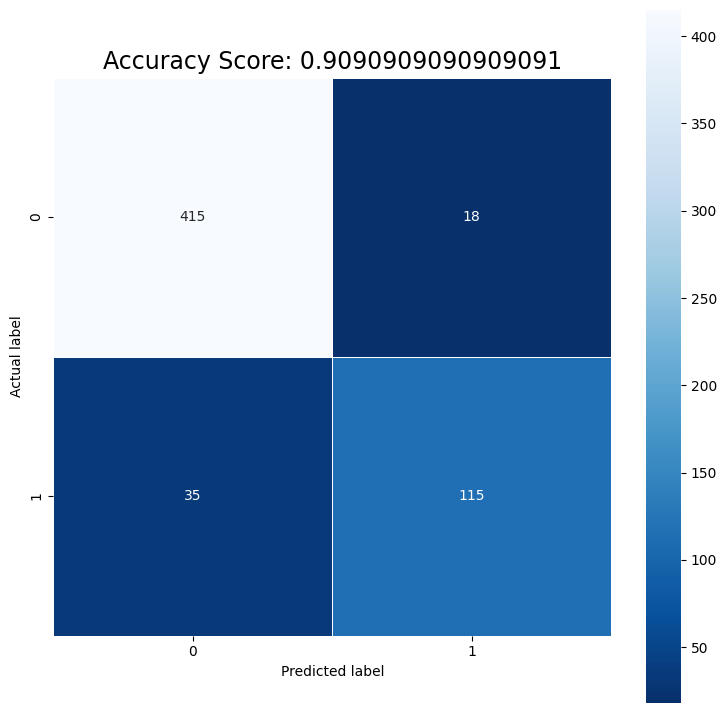

In [7]:
#predictors_array = predictors_chi_original
r = 42
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Other csharp Test and Train Dataset
x_train_other_csharp_binary, x_test_other_csharp_binary, y_train_other_csharp_binary, y_test_other_csharp_binary = train_test_split(other_csharp_binary_predictors, other_csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_other_csharp_multiclass, x_test_other_csharp_multiclass, y_train_other_csharp_multiclass, y_test_other_csharp_multiclass = train_test_split(other_csharp_multiclass_predictors, other_csharp_multiclass_targets, test_size = 0.3, random_state = r)

# csharp Test and Train Dataset
x_train_csharp_binary, x_test_csharp_binary, y_train_csharp_binary, y_test_csharp_binary = train_test_split(csharp_binary_predictors, csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_csharp_multiclass, x_test_csharp_multiclass, y_train_csharp_multiclass, y_test_csharp_multiclass = train_test_split(csharp_multiclass_predictors, csharp_multiclass_targets, test_size = 0.3, random_state = r)

# Combine csharp Training Dataset
x_train_csharp_binary = np.concatenate([x_train_other_csharp_binary, x_train_csharp_binary], axis=0)
y_train_csharp_binary = np.concatenate([y_train_other_csharp_binary, y_train_csharp_binary], axis=0)
x_train_csharp_multiclass = np.concatenate([x_train_other_csharp_multiclass, x_train_csharp_multiclass], axis=0)
y_train_csharp_multiclass = np.concatenate([y_train_other_csharp_multiclass, y_train_csharp_multiclass], axis=0)

# Create a StandardScaler instance for binary and multiclass
from sklearn.preprocessing import StandardScaler
scaler_binary = StandardScaler()
scaler_multiclass = StandardScaler()

# Fit the scaler to the training data and transform the training data
x_train_csharp_binary = scaler_binary.fit_transform(x_train_csharp_binary)
x_train_csharp_multiclass = scaler_multiclass.fit_transform(x_train_csharp_multiclass)

# Transform the test data using the adjusted scaler
x_test_csharp_binary = scaler_binary.transform(x_test_csharp_binary)
x_test_csharp_multiclass = scaler_multiclass.transform(x_test_csharp_multiclass)

# Define the detector model
detector = RandomForestClassifier(random_state=42, n_estimators=524, min_samples_split=12, min_samples_leaf=4, max_features='sqrt', max_depth=13,
                                  criterion='entropy', bootstrap=False)

detector.fit(x_train_csharp_binary, y_train_csharp_binary)

predictions_detector = detector.predict(x_test_csharp_binary)

cm = confusion_matrix(y_test_csharp_binary, predictions_detector)

print(classification_report(y_test_csharp_binary, predictions_detector))

score = detector.score(x_test_csharp_binary, y_test_csharp_binary)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       433
           1       0.83      0.82      0.82       150

    accuracy                           0.91       583
   macro avg       0.88      0.88      0.88       583
weighted avg       0.91      0.91      0.91       583



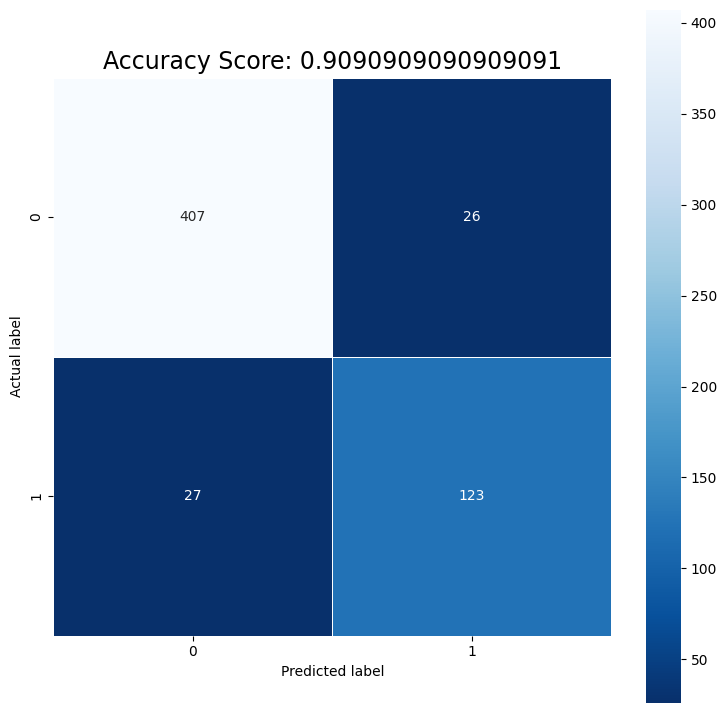

In [8]:
#predictors_array = predictors_chi_original
r = 42
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Other csharp Test and Train Dataset
x_train_other_csharp_binary, x_test_other_csharp_binary, y_train_other_csharp_binary, y_test_other_csharp_binary = train_test_split(other_csharp_binary_predictors, other_csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_other_csharp_multiclass, x_test_other_csharp_multiclass, y_train_other_csharp_multiclass, y_test_other_csharp_multiclass = train_test_split(other_csharp_multiclass_predictors, other_csharp_multiclass_targets, test_size = 0.3, random_state = r)

# csharp Test and Train Dataset
x_train_csharp_binary, x_test_csharp_binary, y_train_csharp_binary, y_test_csharp_binary = train_test_split(csharp_binary_predictors, csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_csharp_multiclass, x_test_csharp_multiclass, y_train_csharp_multiclass, y_test_csharp_multiclass = train_test_split(csharp_multiclass_predictors, csharp_multiclass_targets, test_size = 0.3, random_state = r)

# Combine csharp Training Dataset
x_train_csharp_binary = np.concatenate([x_train_other_csharp_binary, x_train_csharp_binary], axis=0)
y_train_csharp_binary = np.concatenate([y_train_other_csharp_binary, y_train_csharp_binary], axis=0)
x_train_csharp_multiclass = np.concatenate([x_train_other_csharp_multiclass, x_train_csharp_multiclass], axis=0)
y_train_csharp_multiclass = np.concatenate([y_train_other_csharp_multiclass, y_train_csharp_multiclass], axis=0)

# Create a StandardScaler instance for binary and multiclass
from sklearn.preprocessing import StandardScaler
scaler_binary = StandardScaler()
scaler_multiclass = StandardScaler()

# Fit the scaler to the training data and transform the training data
x_train_csharp_binary = scaler_binary.fit_transform(x_train_csharp_binary)
x_train_csharp_multiclass = scaler_multiclass.fit_transform(x_train_csharp_multiclass)

# Transform the test data using the adjusted scaler
x_test_csharp_binary = scaler_binary.transform(x_test_csharp_binary)
x_test_csharp_multiclass = scaler_multiclass.transform(x_test_csharp_multiclass)

# OverSampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
x_train_csharp_binary, y_train_csharp_binary = sm.fit_resample(x_train_csharp_binary, y_train_csharp_binary)

# Define the detector model
detector = RandomForestClassifier(random_state=42, n_estimators=524, min_samples_split=12, min_samples_leaf=4, max_features='sqrt', max_depth=13,
                                  criterion='entropy', bootstrap=False)

detector.fit(x_train_csharp_binary, y_train_csharp_binary)

predictions_detector = detector.predict(x_test_csharp_binary)

cm = confusion_matrix(y_test_csharp_binary, predictions_detector)

print(classification_report(y_test_csharp_binary, predictions_detector))

score = detector.score(x_test_csharp_binary, y_test_csharp_binary)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.83      0.87      0.85       150

    accuracy                           0.92       583
   macro avg       0.89      0.91      0.90       583
weighted avg       0.92      0.92      0.92       583



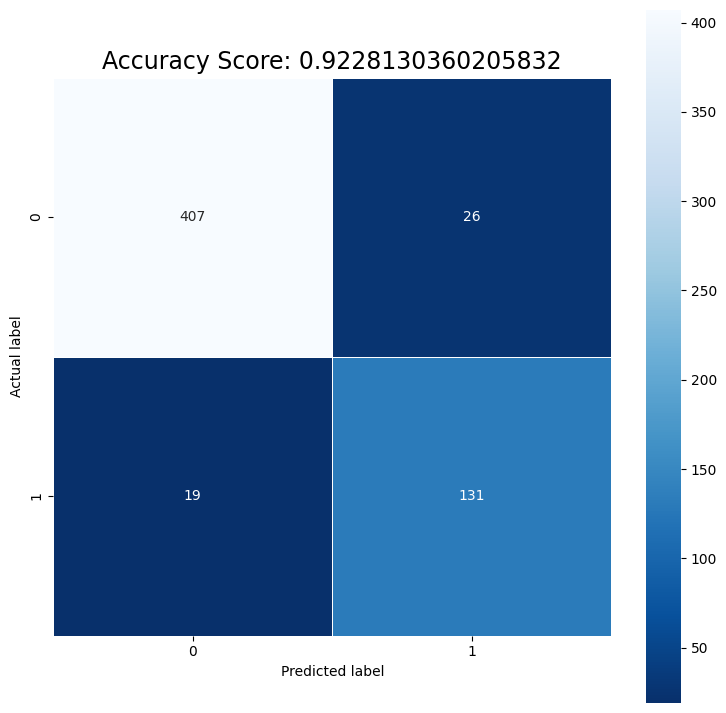

In [9]:
#predictors_array = predictors_chi_original
r = 42
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Other csharp Test and Train Dataset
x_train_other_csharp_binary, x_test_other_csharp_binary, y_train_other_csharp_binary, y_test_other_csharp_binary = train_test_split(other_csharp_binary_predictors, other_csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_other_csharp_multiclass, x_test_other_csharp_multiclass, y_train_other_csharp_multiclass, y_test_other_csharp_multiclass = train_test_split(other_csharp_multiclass_predictors, other_csharp_multiclass_targets, test_size = 0.3, random_state = r)

# csharp Test and Train Dataset
x_train_csharp_binary, x_test_csharp_binary, y_train_csharp_binary, y_test_csharp_binary = train_test_split(csharp_binary_predictors, csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_csharp_multiclass, x_test_csharp_multiclass, y_train_csharp_multiclass, y_test_csharp_multiclass = train_test_split(csharp_multiclass_predictors, csharp_multiclass_targets, test_size = 0.3, random_state = r)

# Combine csharp Training Dataset
x_train_csharp_binary = np.concatenate([x_train_other_csharp_binary, x_train_csharp_binary], axis=0)
y_train_csharp_binary = np.concatenate([y_train_other_csharp_binary, y_train_csharp_binary], axis=0)
x_train_csharp_multiclass = np.concatenate([x_train_other_csharp_multiclass, x_train_csharp_multiclass], axis=0)
y_train_csharp_multiclass = np.concatenate([y_train_other_csharp_multiclass, y_train_csharp_multiclass], axis=0)

# Create a StandardScaler instance for binary and multiclass
from sklearn.preprocessing import StandardScaler
scaler_binary = StandardScaler()
scaler_multiclass = StandardScaler()

# Fit the scaler to the training data and transform the training data
x_train_csharp_binary = scaler_binary.fit_transform(x_train_csharp_binary)
x_train_csharp_multiclass = scaler_multiclass.fit_transform(x_train_csharp_multiclass)

# Transform the test data using the adjusted scaler
x_test_csharp_binary = scaler_binary.transform(x_test_csharp_binary)
x_test_csharp_multiclass = scaler_multiclass.transform(x_test_csharp_multiclass)

# OverSampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_csharp_binary, y_train_csharp_binary = sm.fit_resample(x_train_csharp_binary, y_train_csharp_binary)

# Define the detector model
detector = RandomForestClassifier(random_state=42, n_estimators=524, min_samples_split=12, min_samples_leaf=4, max_features='sqrt', max_depth=13,
                                  criterion='entropy', bootstrap=False)

detector.fit(x_train_csharp_binary, y_train_csharp_binary)

predictions_detector = detector.predict(x_test_csharp_binary)

cm = confusion_matrix(y_test_csharp_binary, predictions_detector)

print(classification_report(y_test_csharp_binary, predictions_detector))

score = detector.score(x_test_csharp_binary, y_test_csharp_binary)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **Exclude instances of no-smell from the training and test sets**


In [10]:
# Find unique classes
unique_classes = np.unique(y_test_csharp_multiclass)

# Count the number of classes
number_classes = len(unique_classes)

if (number_classes > 3):

  x_train_multiclass, y_train_multiclass = x_train_csharp_multiclass, y_train_csharp_multiclass

  finish = False
  while (finish == False):
    try:
      max = x_train_multiclass.shape[0]
      # Exclude instances of no-smell from the training set (targets)
      for i in range(0, max):
        if (y_train_multiclass[i] == 0):
          y_train_multiclass = np.delete(y_train_multiclass, i, axis = 0)
          x_train_multiclass = np.delete(x_train_multiclass, i, axis = 0)
          i = 0
          max = max - 1
      finish = True
      print("The deletion is over in the y_train set!")
    except:
      finish == False

  x_test_multiclass, y_test_multiclass = x_test_csharp_multiclass, y_test_csharp_multiclass
  finish = False
  while (finish == False):
    try:
      max = x_test_multiclass.shape[0]
      # Exclude instances of no-smell from the test set (predictors)
      for i in range(0, max):
        if (y_test_multiclass[i] == 0):
          y_test_multiclass = np.delete(y_test_multiclass, i, axis = 0)
          x_test_multiclass = np.delete(x_test_multiclass, i, axis = 0)
          i = 0
          max = max - 1
      finish = True
      print("The deletion is over in the x_train set!")
    except:
      finish = False

  # Original mapping -> Remapping
  mapping = {1.0: 0.0, 2.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 4.0, 6.0: 5.0, 7.0: 6.0, 8.0: 7.0, 9.0: 8.0, 10.0: 9.0, 11.0: 10.0, 12.0: 11.0}

  y_train_multiclass = np.array([mapping[label] for label in y_train_multiclass])
  y_test_multiclass = np.array([mapping[label] for label in y_test_multiclass])
  print("Prepare training and test set for applying XGBoost")

The deletion is over in the y_train set!
The deletion is over in the x_train set!
Prepare training and test set for applying XGBoost


# **Code Smell Severity Classification with three ensemble method**


# **RANDOM FOREST**

# **Oversampling BorderlineSMOTE**

In [11]:
pip install imbalanced-learn

# **Randomized**

              precision    recall  f1-score   support

         3.0       0.84      0.86      0.85        94
         4.0       0.56      0.55      0.55        44
         5.0       0.56      0.42      0.48        12
         9.0       0.00      0.00      0.00         0

    accuracy                           0.73       150
   macro avg       0.49      0.46      0.47       150
weighted avg       0.73      0.73      0.73       150



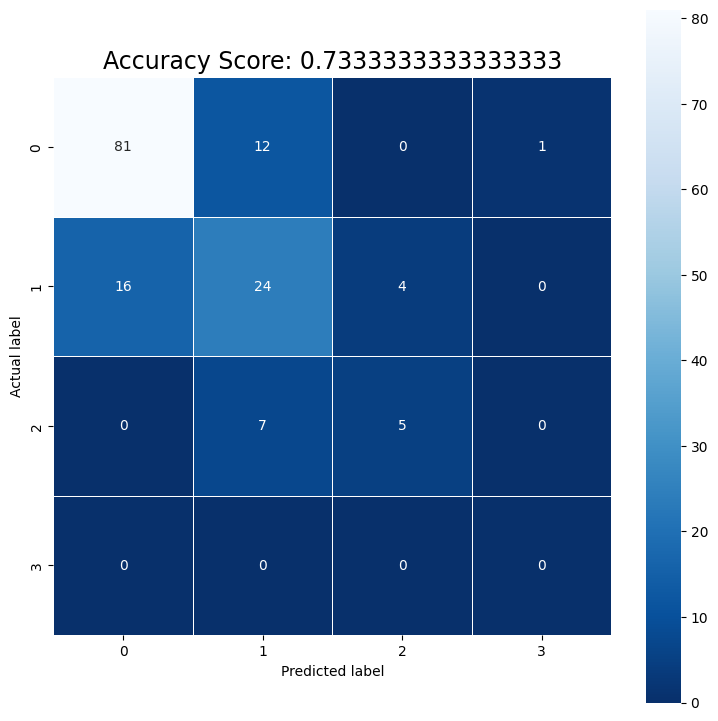

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = RandomForestClassifier(random_state=42, n_estimators=970, min_samples_split=7, min_samples_leaf=3, max_features=None, max_depth=6,
                                    criterion='log_loss', bootstrap=True)

classifier.fit(x_train_multiclass, y_train_multiclass)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BorderlineSMOTE**

In [13]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         3.0       0.88      0.84      0.86        94
         4.0       0.61      0.64      0.62        44
         5.0       0.62      0.67      0.64        12

    accuracy                           0.77       150
   macro avg       0.53      0.54      0.53       150
weighted avg       0.78      0.77      0.77       150



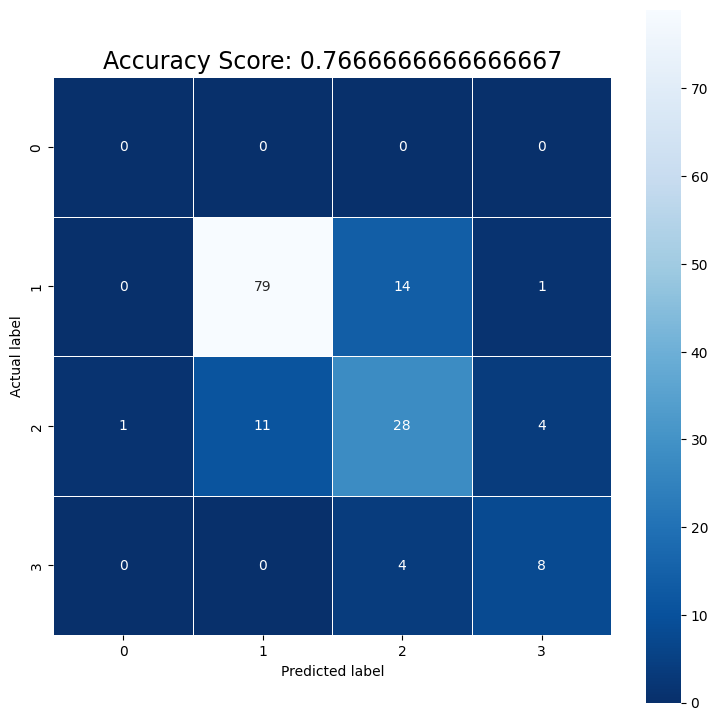

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = RandomForestClassifier(random_state=42, n_estimators=524, min_samples_split=12, min_samples_leaf=4, max_features='sqrt', max_depth=13,
                                    criterion='entropy', bootstrap=False)

classifier.fit(x_train_multiclass_res, y_train_multiclass_res)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

## **SMOTE**

In [15]:
from imblearn.over_sampling import SMOTE

# OverSampling
sm = SMOTE(random_state=42, k_neighbors=1)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         3.0       0.89      0.87      0.88        94
         4.0       0.63      0.61      0.62        44
         5.0       0.50      0.58      0.54        12

    accuracy                           0.77       150
   macro avg       0.50      0.52      0.51       150
weighted avg       0.78      0.77      0.78       150



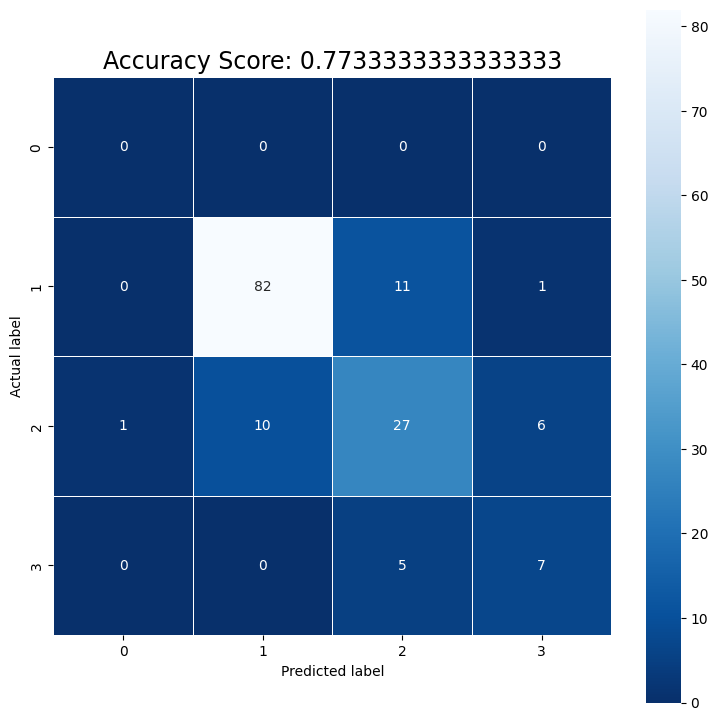

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = RandomForestClassifier(random_state=42, n_estimators=118, min_samples_split=12, min_samples_leaf= 3, max_features='sqrt', max_depth=9,
                                    criterion='gini', bootstrap=False)

classifier.fit(x_train_multiclass_res, y_train_multiclass_res)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **EXTREME GRADIENTE BOOSTING (XGBOOST)**

# **Randomized**

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         3.0       0.86      0.84      0.85        94
         4.0       0.59      0.61      0.60        44
         5.0       0.64      0.58      0.61        12

    accuracy                           0.75       150
   macro avg       0.52      0.51      0.51       150
weighted avg       0.76      0.75      0.76       150



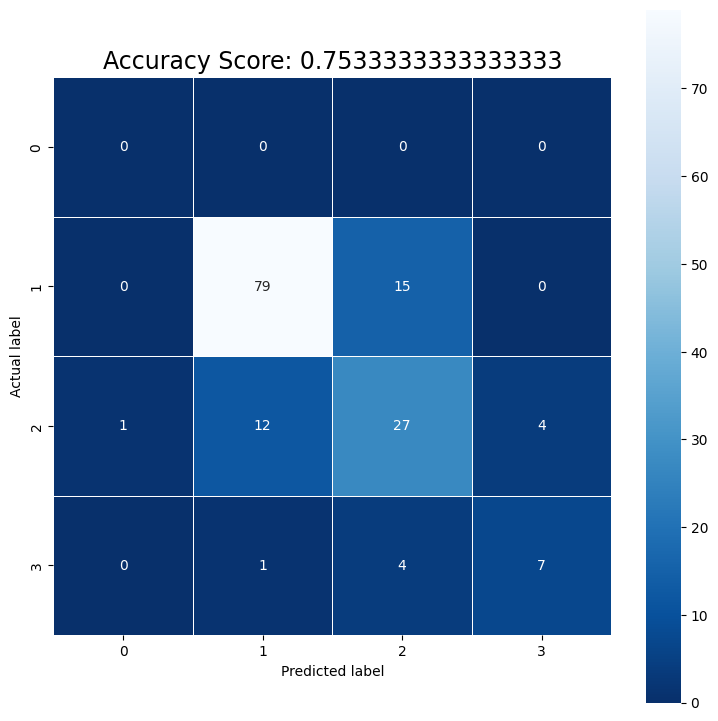

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Original mapping -> Remapping
mapping = {0.0: 0.0, 1.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 4.0, 6.0: 5.0, 7.0: 6.0, 9.0: 7.0, 10.0: 8.0, 11.0: 9.0}

y_train_multiclass_remapped = np.array([mapping[label] for label in y_train_multiclass])
y_test_multiclass_remapped = np.array([mapping[label] for label in y_test_multiclass])

# Define the classifier model
classifier = XGBClassifier(num_class=12, random_state=42, tree_method='approx', objective='multi:softmax', n_estimators=420, max_depth=5,
                           learning_rate=0.5, grow_policy='lossguide', booster='gbtree')

classifier.fit(x_train_multiclass, y_train_multiclass_remapped)

predictions_classifier = classifier.predict(x_test_multiclass)

# Remapping -> Original mapping
re_mapping = {0.0: 0.0, 1.0: 1.0, 2.0: 3.0, 3.0: 4.0, 4.0: 5.0, 5.0: 6.0, 6.0: 7.0, 7.0: 9.0, 8.0: 10.0, 9.0: 11.0}
predictions_classifier_remapped = np.array([re_mapping[label] for label in predictions_classifier])

cm = confusion_matrix(y_test_multiclass, predictions_classifier_remapped)

print(classification_report(y_test_multiclass, predictions_classifier_remapped))

score = classifier.score(x_test_multiclass, y_test_multiclass_remapped)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BorderlineSMOTE**

In [18]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         3.0       0.87      0.80      0.83        94
         4.0       0.53      0.59      0.56        44
         5.0       0.58      0.58      0.58        12
         6.0       0.00      0.00      0.00         0

    accuracy                           0.72       150
   macro avg       0.40      0.39      0.40       150
weighted avg       0.75      0.72      0.73       150



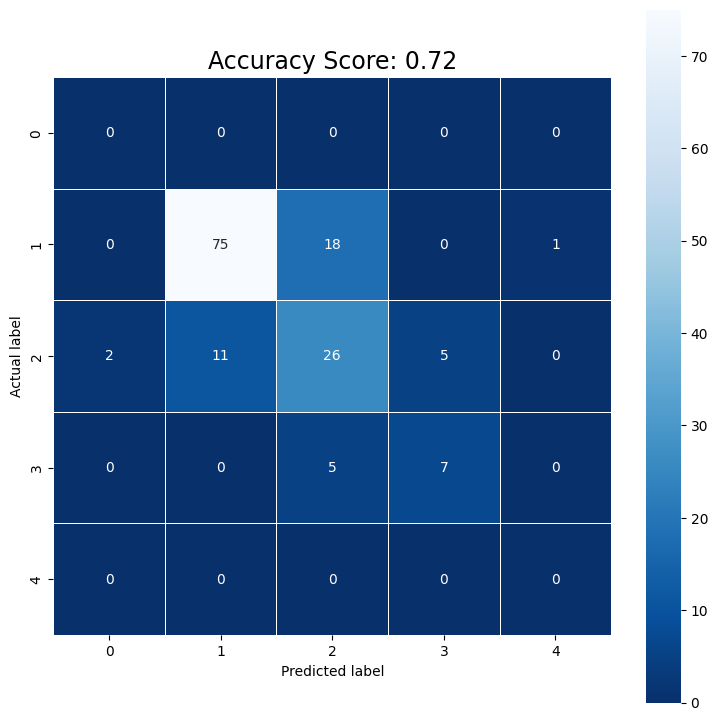

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Original mapping -> Remapping
mapping = {0.0: 0.0, 1.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 4.0, 6.0: 5.0, 7.0: 6.0, 9.0: 7.0, 10.0: 8.0, 11.0: 9.0}

y_train_multiclass_remapped = np.array([mapping[label] for label in y_train_multiclass_res])
y_test_multiclass_remapped = np.array([mapping[label] for label in y_test_multiclass])

# Define the classifier model
classifier = XGBClassifier(num_class=12, random_state=42, tree_method='hist', objective='multi:softmax', n_estimators=406, max_depth=3,
                           learning_rate=0.3310344827586207, grow_policy='lossguide', booster='gbtree')

classifier.fit(x_train_multiclass_res, y_train_multiclass_remapped)

predictions_classifier = classifier.predict(x_test_multiclass)

# Remapping -> Original mapping
re_mapping = {0.0: 0.0, 1.0: 1.0, 2.0: 3.0, 3.0: 4.0, 4.0: 5.0, 5.0: 6.0, 6.0: 7.0, 7.0: 9.0, 8.0: 10.0, 9.0: 11.0}
predictions_classifier_remapped = np.array([re_mapping[label] for label in predictions_classifier])

cm = confusion_matrix(y_test_multiclass, predictions_classifier_remapped)

print(classification_report(y_test_multiclass, predictions_classifier_remapped))

score = classifier.score(x_test_multiclass, y_test_multiclass_remapped)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

## **SMOTE**

In [20]:
from imblearn.over_sampling import SMOTE

# OverSampling
sm = SMOTE(random_state=42, k_neighbors=1)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         3.0       0.88      0.84      0.86        94
         4.0       0.58      0.59      0.58        44
         5.0       0.43      0.50      0.46        12

    accuracy                           0.74       150
   macro avg       0.47      0.48      0.48       150
weighted avg       0.75      0.74      0.75       150



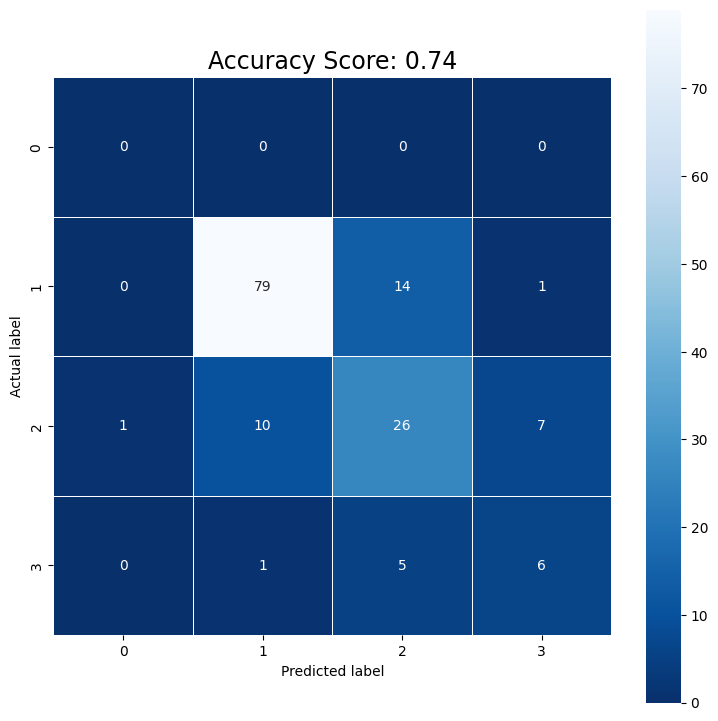

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Original mapping -> Remapping
mapping = {0.0: 0.0, 1.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 4.0, 6.0: 5.0, 7.0: 6.0, 9.0: 7.0, 10.0: 8.0, 11.0: 9.0}

y_train_multiclass_remapped = np.array([mapping[label] for label in y_train_multiclass_res])
y_test_multiclass_remapped = np.array([mapping[label] for label in y_test_multiclass])

# Define the classifier model
classifier = XGBClassifier(num_class=12, random_state=42, tree_method='approx', objective='multi:softprob', n_estimators=586, max_depth=5,
                           learning_rate=0.5, grow_policy='lossguide', booster='dart')

classifier.fit(x_train_multiclass_res, y_train_multiclass_remapped)

predictions_classifier = classifier.predict(x_test_multiclass)

# Remapping -> Original mapping
re_mapping = {0.0: 0.0, 1.0: 1.0, 2.0: 3.0, 3.0: 4.0, 4.0: 5.0, 5.0: 6.0, 6.0: 7.0, 7.0: 9.0, 8.0: 10.0, 9.0: 11.0}
predictions_classifier_remapped = np.array([re_mapping[label] for label in predictions_classifier])

cm = confusion_matrix(y_test_multiclass, predictions_classifier_remapped)

print(classification_report(y_test_multiclass, predictions_classifier_remapped))

score = classifier.score(x_test_multiclass, y_test_multiclass_remapped)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **CATEGORICAL BOOSTING (CATBOOST)**

In [22]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.5 MB/s eta 0:00:00


# **Randomized**

Found only 10 unique classes in the data, but have defined 12 classes. Probably something is wrong with data.


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         3.0       0.90      0.83      0.86        94
         4.0       0.59      0.66      0.62        44
         5.0       0.58      0.58      0.58        12

    accuracy                           0.76       150
   macro avg       0.52      0.52      0.52       150
weighted avg       0.78      0.76      0.77       150



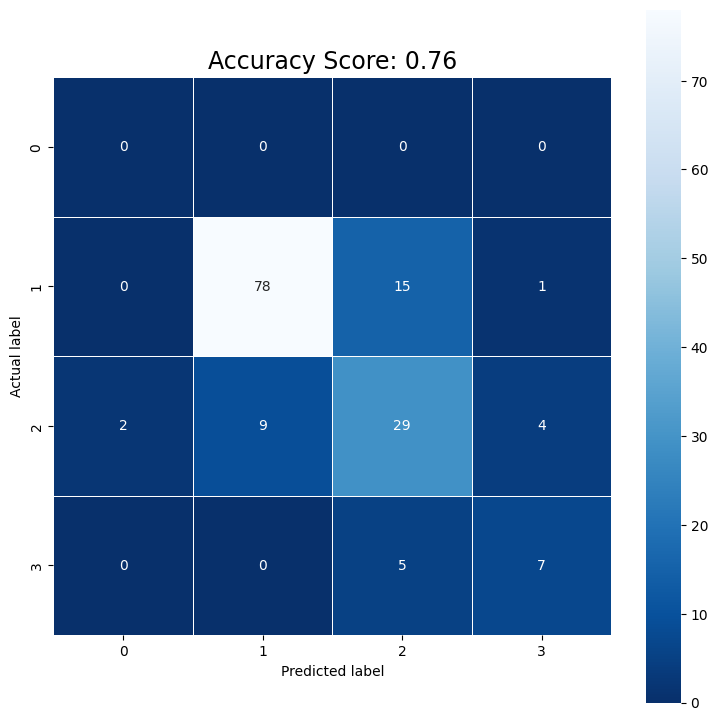

In [23]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False, classes_count=12, objective='MultiClass',
                                learning_rate=0.16206896551724137, leaf_estimation_method='Newton', l2_leaf_reg=7, iterations=592, grow_policy='Lossguide',
                                feature_border_type='Uniform', depth=6, border_count=192, bootstrap_type='MVS', auto_class_weights='Balanced')

classifier.fit(x_train_multiclass, y_train_multiclass)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BorderlineSMOTE**

In [24]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

Found only 10 unique classes in the data, but have defined 12 classes. Probably something is wrong with data.


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         3.0       0.88      0.84      0.86        94
         4.0       0.59      0.55      0.56        44
         5.0       0.47      0.67      0.55        12

    accuracy                           0.74       150
   macro avg       0.48      0.51      0.49       150
weighted avg       0.76      0.74      0.75       150



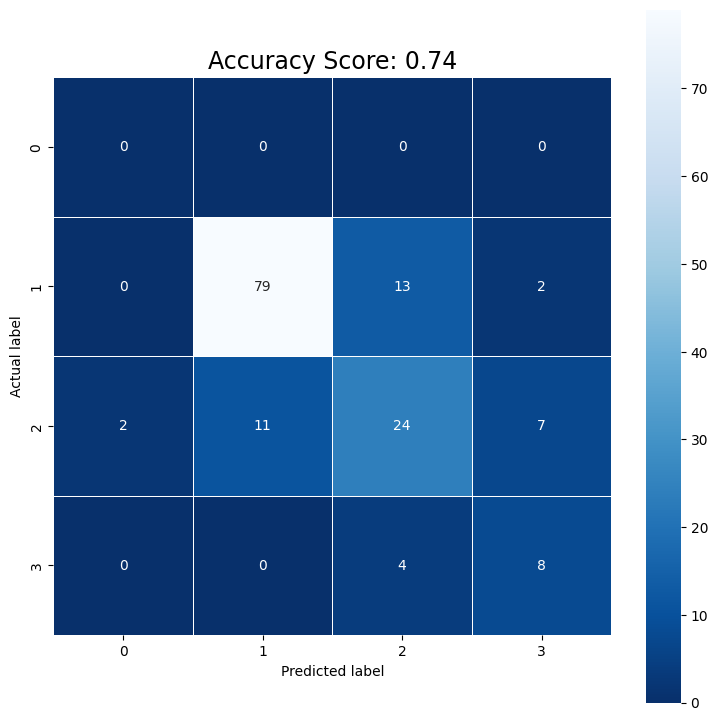

In [25]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False, classes_count=12, objective='MultiClass',
                                learning_rate=0.3310344827586207, leaf_estimation_method='Newton', l2_leaf_reg=6, iterations=734, grow_policy='Depthwise',
                                feature_border_type='GreedyLogSum', depth=15, border_count=96, bootstrap_type='Bayesian', auto_class_weights='SqrtBalanced')

classifier.fit(x_train_multiclass_res, y_train_multiclass_res)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

## **SMOTE**

In [26]:
from imblearn.over_sampling import SMOTE

# OverSampling
sm = SMOTE(random_state=42, k_neighbors=1)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

Found only 10 unique classes in the data, but have defined 12 classes. Probably something is wrong with data.


              precision    recall  f1-score   support

         3.0       0.88      0.86      0.87        94
         4.0       0.57      0.55      0.56        44
         5.0       0.44      0.58      0.50        12

    accuracy                           0.75       150
   macro avg       0.63      0.66      0.64       150
weighted avg       0.75      0.75      0.75       150



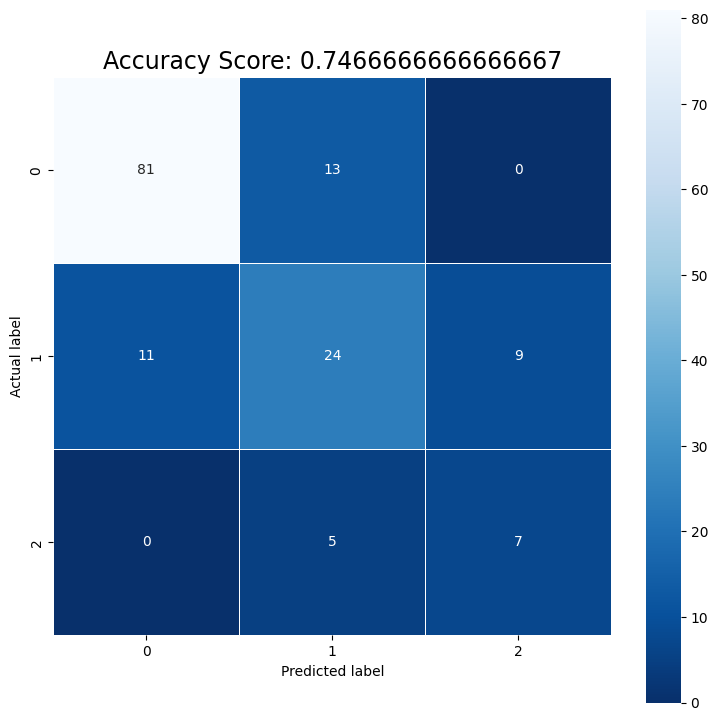

In [27]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False, classes_count=12, objective='MultiClass',
                                learning_rate=0.07758620689655171, leaf_estimation_method='Gradient', l2_leaf_reg=8, iterations=548, grow_policy='Depthwise',
                                feature_border_type='GreedyLogSum', depth=6, border_count=208, bootstrap_type='Bayesian', auto_class_weights='Balanced')

classifier.fit(x_train_multiclass_res, y_train_multiclass_res)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()